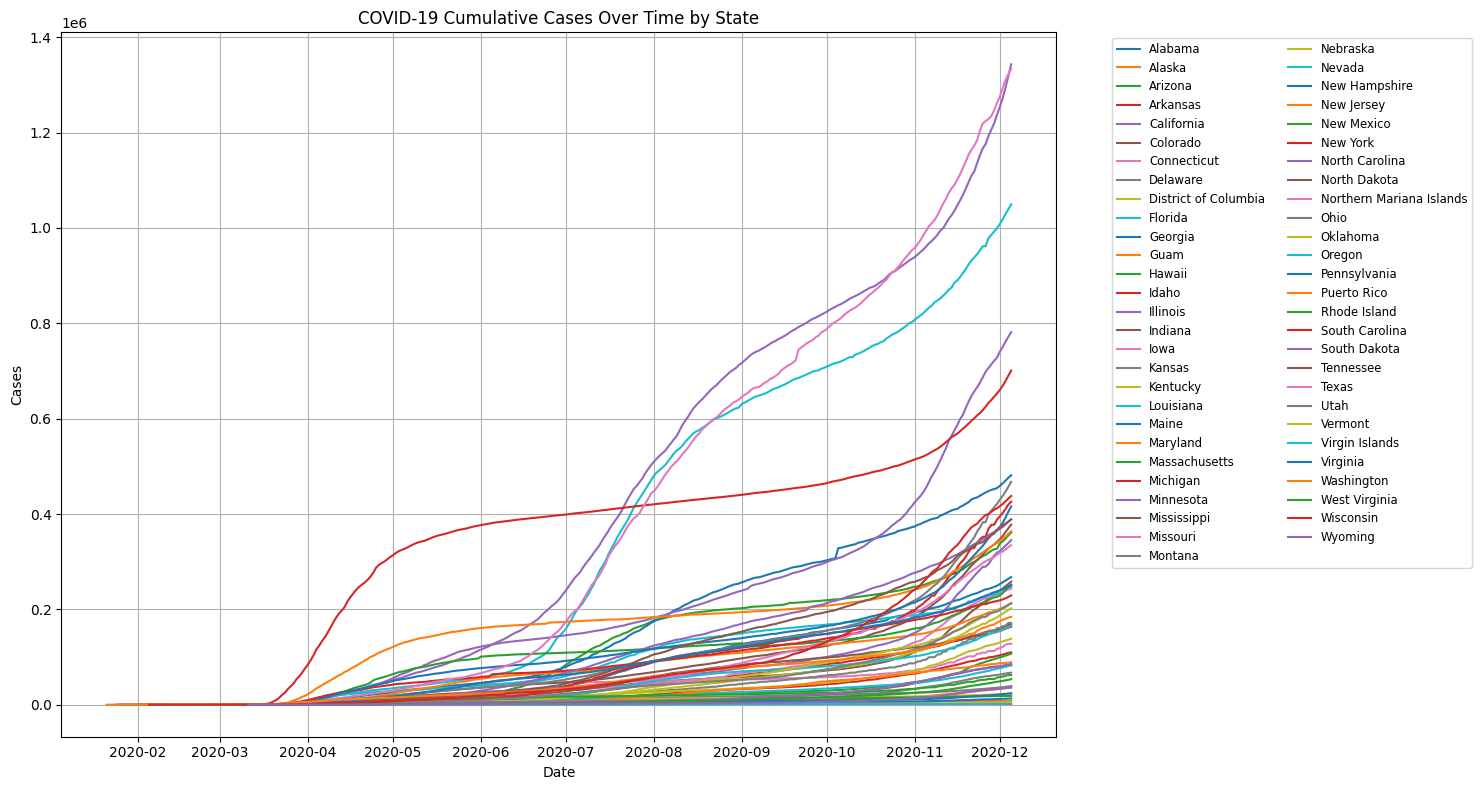

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("us_counties_covid19_daily.csv")
df['date'] = pd.to_datetime(df['date'])

# Group by date and state, sum cases (to combine counties)
state_cases = df.groupby(['date', 'state'])['cases'].sum().reset_index()

# Pivot for plotting: rows = date, columns = state
pivot_df = state_cases.pivot(index='date', columns='state', values='cases')

# Plot all states
plt.figure(figsize=(15, 8))
for state in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[state], label=state)

plt.title("COVID-19 Cumulative Cases Over Time by State")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()
